# Supervised Machine Learning Homework - Predicting Credit Risk

   * Create two ML models using Logistic Regression and Random Forest
   * Compare model score using r2_score, score, and accuracy_score functions
   * Calculate confusion matrix and plot confusion matrix
   
   
## Thought 
   * Random Forest model is very slightly better than Logistic Regression model
   * Score: RF 0.994428394552208 vs LR 0.9920553033429633
   * With the given dataset, two models are very accurate to predict whether a loan will be approved or not.


In [1]:
# Dependencies

import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

In [2]:
# Import the data
path = "./Resources/lending_data.csv"

lending_data = pd.read_csv(path)

print('Shape of data', lending_data.shape)
lending_data.head()

Shape of data (77536, 8)


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
# Split the data into X_train, X_test, y_train, y_test

X = lending_data[["loan_size", "interest_rate", "borrower_income", "debt_to_income", "num_of_accounts", "derogatory_marks", "total_debt"]]
y = lending_data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [4]:
y_test

9943     0
43121    0
50696    0
2830     0
45075    0
        ..
45407    0
52619    0
70441    0
71645    0
56043    0
Name: loan_status, Length: 19384, dtype: int64

# Logistic Regression

In [5]:
# Train a Logistic Regression model print the model score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

clf = LogisticRegression()

clf.fit(X_train, y_train)

prediction = clf.predict(X_test)

print('r2_score:', r2_score(y_test, prediction))
print('Logistic Regression model score test set: ', clf.score(X_test, y_test))
print('Logistic Regression model score train set: ', clf.score(X_train, y_train))
print('Logistic Regression model score entire set: ', clf.score(X, y))


r2_score: 0.7797184546385509
Logistic Regression model score test set:  0.9931902600082543
Logistic Regression model score train set:  0.9916769844545329
Logistic Regression model score entire set:  0.9920553033429633


In [6]:
# Accuracy score calculation using for loop

y_test_data = np.array(y_test)

count = 0

for i in range(len(prediction)):
    
    if prediction[i] == y_test_data[i]:
        count += 1
        
print('Accuracy Score of Logistic Regression: ', count/len(prediction))

Accuracy Score of Logistic Regression:  0.9931902600082543


In [7]:
# Accuracy score calculation using accuracy_score function

from sklearn.metrics import accuracy_score

accuracy_score(y_test, prediction)

0.9931902600082543

# Random Forest Model

In [8]:
# Train a Random Forest Classifier model and print the model score

from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(max_depth=2, random_state=0)

clf2.fit(X_train, y_train)
prediction2 = clf2.predict(X_test)

print('r2_score:', r2_score(y_test, prediction2))

print('Random Forest model score test set: ', clf2.score(X_test, y_test))
print('Random Forest model score train set: ', clf2.score(X_train, y_train))
print('Random Forest model score entire set:', clf2.score(X, y))

r2_score: 0.8281136426346268
Random Forest model score test set:  0.9946863392488651
Random Forest model score train set:  0.9943424129866557
Random Forest model score entire set: 0.994428394552208


In [9]:
# Accuracy score calculation using for loop

count2 = 0

for i in range(len(prediction2)):
    
    if prediction2[i] == y_test_data[i]:
        count2 += 1
        
print('Accuracy Score of Random Forest: ', count2/len(prediction2))

Accuracy Score of Random Forest:  0.9946863392488651


In [10]:
accuracy_score(y_test, prediction2)

0.9946863392488651

In [11]:
from sklearn.metrics import confusion_matrix

print('Confusion Matrix - Logistic Regression')
print(confusion_matrix(y_test, prediction))

print('\n\nConfusion Matrix - Random Forest')
print(confusion_matrix(y_test, prediction2))

Confusion Matrix - Logistic Regression
[[18677    88]
 [   44   575]]


Confusion Matrix - Random Forest
[[18666    99]
 [    4   615]]


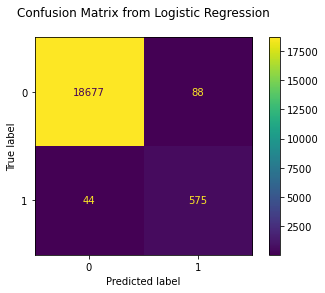

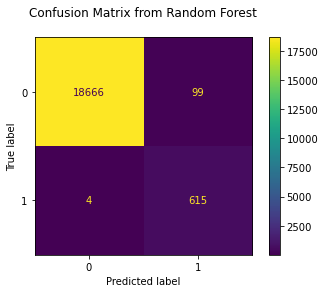

In [12]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


plot_confusion_matrix(clf, X_test, y_test)
plt.title("Confusion Matrix from Logistic Regression\n")

plot_confusion_matrix(clf2, X_test, y_test)
plt.title("Confusion Matrix from Random Forest\n")
plt.show()

# Balanced Accuracy 

In [13]:
from sklearn.metrics import balanced_accuracy_score

print('Logistic Regression Balanced Accuracy: ', balanced_accuracy_score(y_test, prediction))

Logistic Regression Balanced Accuracy:  0.9621140136894254


In [14]:
print('Logistic Regression Balanced Accuracy: ', balanced_accuracy_score(y_test, prediction2))

Logistic Regression Balanced Accuracy:  0.9941310925411528
